<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/NLP_004(Sub_word_Tokenization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [2]:
imdb, info=tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWT4QMG/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWT4QMG/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWT4QMG/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [32]:
train=imdb["train"]
test=imdb["test"]
info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [26]:
#Getting encoder object
text_encoder=info.features["text"].encoder
text_encoder

<SubwordTextEncoder vocab_size=8185>

In [ ]:
text_encoder.subwords

In [6]:
for item in train.take(1):
  print(text_encoder.decode(item[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [7]:
sample="Tensorflow course for begineers"

tokens=text_encoder.encode(sample)
sentence=text_encoder.decode(tokens)
sentence

'Tensorflow course for begineers'

In [33]:
BUFFER_SIZE=10000
BATCH_SIZE=64

train=imdb["train"]
test=imdb["test"]

train=train.shuffle(BUFFER_SIZE)
train=train.padded_batch(BATCH_SIZE)

test=test.padded_batch(BATCH_SIZE)

(64, 933)


In [34]:
dims=32

model=tf.keras.Sequential([tf.keras.layers.Embedding(text_encoder.vocab_size, 64),
                     tf.keras.layers.GlobalAveragePooling1D(),
                     tf.keras.layers.Dense(units=6, activation="relu"),
                     tf.keras.layers.Dense(units=1, activation="sigmoid")])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
391/391 [==============================] - 11s 24ms/step - loss: 0.6793 - accuracy: 0.5791 - val_loss: 0.6418 - val_accuracy: 0.7283
Epoch 2/10
391/391 [==============================] - 10s 24ms/step - loss: 0.5103 - accuracy: 0.8093 - val_loss: 0.4301 - val_accuracy: 0.8324
Epoch 3/10
391/391 [==============================] - 10s 24ms/step - loss: 0.3488 - accuracy: 0.8761 - val_loss: 0.3487 - val_accuracy: 0.8677
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 0.2852 - accuracy: 0.8971 - val_loss: 0.3215 - val_accuracy: 0.8752
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2508 - accuracy: 0.9102 - val_loss: 0.3091 - val_accuracy: 0.8791
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2273 - accuracy: 0.9177 - val_loss: 0.3054 - val_accuracy: 0.8793
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2054 - accuracy: 0.9276 - val_loss: 0.3236 - val_accuracy: 0.

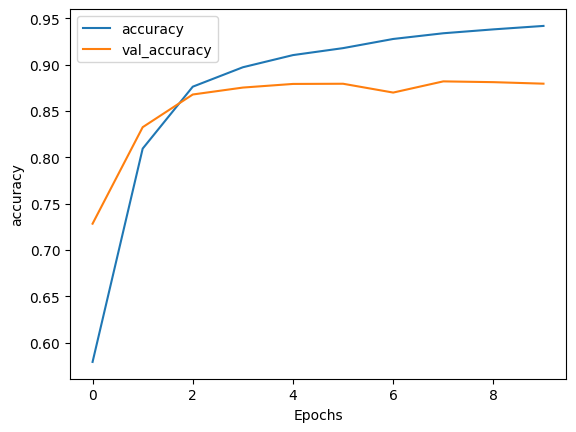

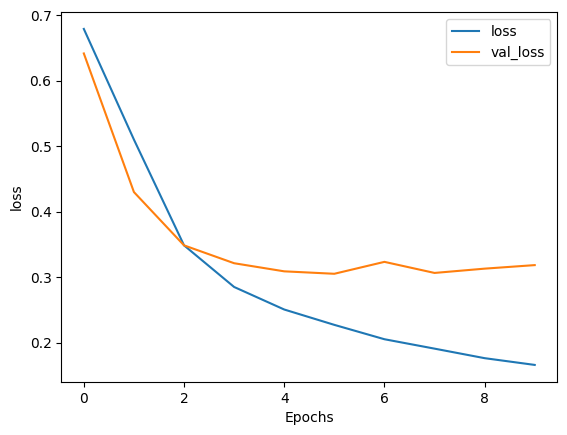

In [35]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")